<a href="https://colab.research.google.com/github/sordenesf/Heart-Disease/blob/main/Proyecto_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Indicators of Heart Disease - Parte 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Week 8 - Boosting/02 Proyecto 2 - Parte 2 (base)/heart_2022_with_nans.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


##2.1 Columnas innecesarias:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

Se revisan columnas numéricas:

In [6]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


Se revisan columnas categóricas:

In [7]:
from sklearn.compose import make_column_selector
selector_cat = make_column_selector(dtype_include='object')
selector_num= make_column_selector(dtype_include='number')

Se revisan los grupos dentro de cada columna categórica:

In [8]:
for columna in selector_cat(df):
  print(df[columna].value_counts())
  print('\n','-'*40,'\n')

State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska                   5865
Okla

Realizada la revisión, **NO se detectan columnas innecesarias**

In [9]:
columnas_ordinales= ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory']

Puesto que se han analizado las categorías de las columnas, se encuentra que algunas de ellas son de tipo ordinal, por lo que se codifican numéricamente:

In [10]:
dicc_gh = {'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}

In [11]:
dicc_lct= {'Within past year (anytime less than 12 months ago)':0,
           'Within past 2 years (1 year but less than 2 years ago)':1,
           'Within past 5 years (2 years but less than 5 years ago)':2,
           '5 or more years ago':3}

In [12]:
dicc_rt= {'None of them':0, '1 to 5':1, '6 or more, but not all':2, 'All':3}

In [13]:
# Analizar bien si esta columna puede ser tratada como nominal u ordinal
dicc_ss= {'Never smoked':0, 'Former smoker':1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3  }

In [14]:
dicc_ecu= {'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3}

In [15]:
dicc_ac= {'Age 18 to 24': 0,
          'Age 25 to 29': 1,
          'Age 30 to 34': 2,
          'Age 35 to 39': 3,
          'Age 40 to 44': 4,
          'Age 45 to 49': 5,
          'Age 50 to 54': 6,
          'Age 55 to 59': 7,
          'Age 60 to 64': 8,
          'Age 65 to 69': 9,
          'Age 70 to 74': 10,
          'Age 75 to 79': 11,
          'Age 80 or older': 12}

Conversión de variables nominales:

In [16]:
df['GeneralHealth']= df['GeneralHealth'].replace(dicc_gh)
df['LastCheckupTime']= df['LastCheckupTime'].replace(dicc_lct)
df['RemovedTeeth']= df['RemovedTeeth'].replace(dicc_rt)
df['SmokerStatus']= df['SmokerStatus'].replace(dicc_ss)
df['ECigaretteUsage']= df['ECigaretteUsage'].replace(dicc_ecu)
df['AgeCategory']= df['AgeCategory'].replace(dicc_ac)

##2.2 Valores faltantes:

La cantidad de registros que contienen al menos un dato nulo son los siguientes:

In [17]:
filas_na = df.isna().any(axis=1).sum()
filas_na

199110

Porcentaje de filas con al menos un valor nulo:

In [18]:
filas_total = df.shape[0]
filas_na/filas_total

0.4473055183630923

Porcentaje de valores nulos en cada una de las filas del DataFrame:

In [19]:
df.isna().sum()*100/df.shape[0]

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.269134
PhysicalHealthDays            2.454777
MentalHealthDays              2.036924
LastCheckupTime               1.866413
PhysicalActivities            0.245545
SleepHours                    1.225030
RemovedTeeth                  2.552052
HadHeartAttack                0.688560
HadAngina                     0.989594
HadStroke                     0.349784
HadAsthma                     0.398309
HadSkinCancer                 0.706083
HadCOPD                       0.498504
HadDepressiveDisorder         0.631723
HadKidneyDisease              0.432681
HadArthritis                  0.591510
HadDiabetes                   0.244197
DeafOrHardOfHearing           4.638399
BlindOrVisionDifficulty       4.844406
DifficultyConcentrating       5.445576
DifficultyWalking             5.394355
DifficultyDressingBathing     5.372564
DifficultyErrands             5.763684
SmokerStatus             

Las filas que contienen al menos un valor nulo son un 47% del dataset, por lo que eliminar estos registros conlleva una enorme pérdida de información.

Mirando los valores nulos en cada una de sus columnas, ninguna de ellas no tiene más de un 20% de valores nulos, por lo que se imputarán valores para evitar la eliminación de la columna.

De las columnas, se sabe que el BMI es obtenido con la fórmula BMI = peso[Kg] / altura[m]**2
En este caso, se imputarán los valores  nulos de la columna BMI cuando la altura y el peso sean conocidos (no existe fuga de datos)

In [20]:
df['BMI'].isna().sum()

48806

In [21]:
# Filtro cuando el peso y la altura son datos conocidos, pero el BMI es nulo
mask_bmi = df['HeightInMeters'].notna() & df['WeightInKilograms'].notna() & df['BMI'].isna()
mask_bmi.sum()

2238

Se rellenan los valores que han sido filtrados:

In [22]:
df.loc[mask_bmi,'BMI'] = df.loc[mask_bmi,'WeightInKilograms'] / df.loc[mask_bmi,'HeightInMeters']**2

Comprobación de los datos nulos en la columna BMI (hay 2.238 valors nulos menos)

In [23]:
df['BMI'].isna().sum()

46568

Cabe destacar que con esta imputación se pudiesen generar valores que están fuera del rango original de la columna (outliers)

Para el manejo de los valores faltantes que aún no han sido tratados, se imputará la moda en cada de las columnas ya que es una medida de tendencia central robusta:

In [24]:
modas = [df[columna].mode()[0] for columna in df.columns ]
diccionario_modas = dict(zip(df.columns,modas))

Se verifica que no queden datos faltantes en las columnas:

In [25]:
df = df.fillna(diccionario_modas)
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

##2.3 Inconsistencias en los datos para los valores categóricos

En el punto anterior se revisaron los datos categóricos y no se detectaron datos inconsistentes en dichas columnas

##2.4 Gráficas univariantes para el objetivo y todas las características

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Función para realizar histogramas

def dib_histograma(columna, data, bins=10, hue=None):
  plt.figure(figsize=(8,4))
  sns.histplot(x=columna, data=data, bins=bins, hue=hue, zorder=1)
  plt.grid(zorder=2)
  plt.ylabel('Frecuencia')
  plt.title('Histograma de la variable '+ columna)


In [28]:
# Función para realizar Boxplot

def dib_boxplot(columna, data):
  plt.figure(figsize=(2,6))
  sns.boxplot(y=columna, data=data)
  #plt.title('Boxplot de la variable\n' + columna)

In [29]:
# Función para relizar Barplot

def dib_barplot(columna1, columna2, data,hue=None):
  plt.figure(figsize=(8,4))
  sns.barplot(x=columna1, y=columna2, data=data, hue=hue)

###PhysicalHealthDays

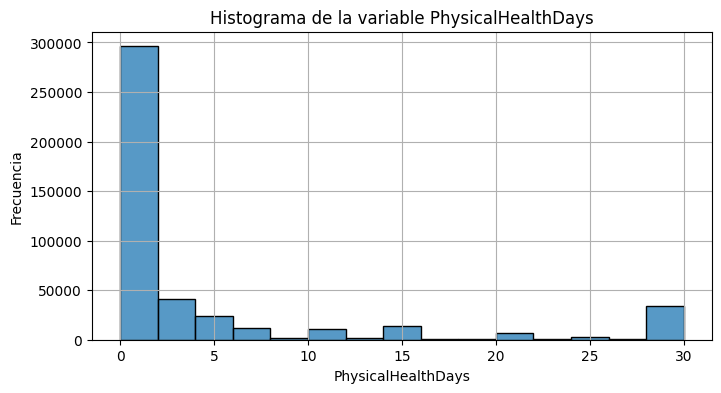

In [30]:
caracteristica= 'PhysicalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

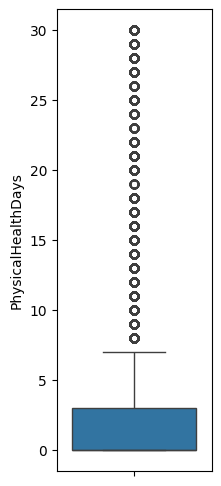

In [31]:
dib_boxplot(caracteristica,df)

###MentalHealthDays

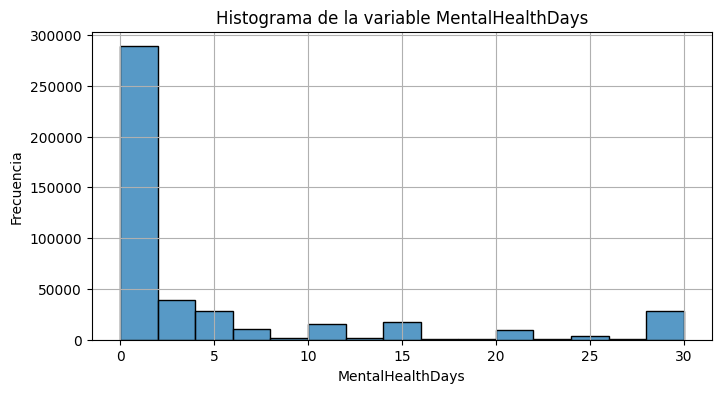

In [32]:
caracteristica= 'MentalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

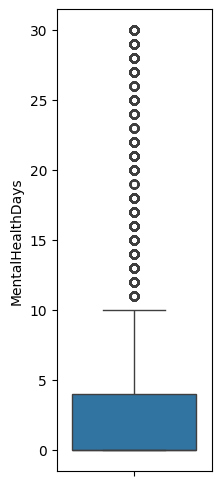

In [33]:
dib_boxplot(caracteristica,df)

###SleepHours

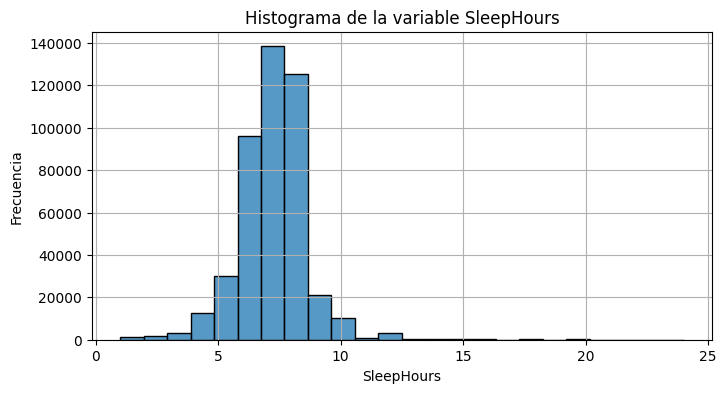

In [34]:
caracteristica= 'SleepHours'
dib_histograma(caracteristica,df,24,hue=None)

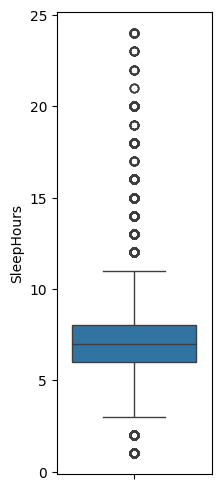

In [35]:
dib_boxplot(caracteristica,df)

###HeightInMeters

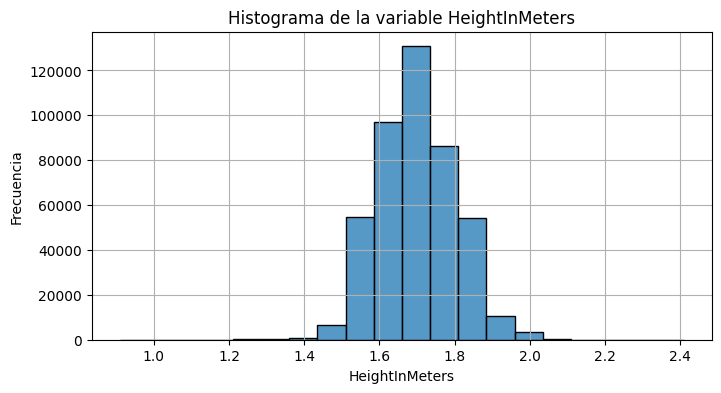

In [36]:
caracteristica= 'HeightInMeters'
dib_histograma(caracteristica,df,20,hue=None)

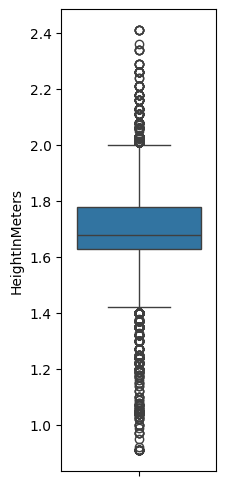

In [37]:
dib_boxplot(caracteristica,df)

###WeightInKilograms

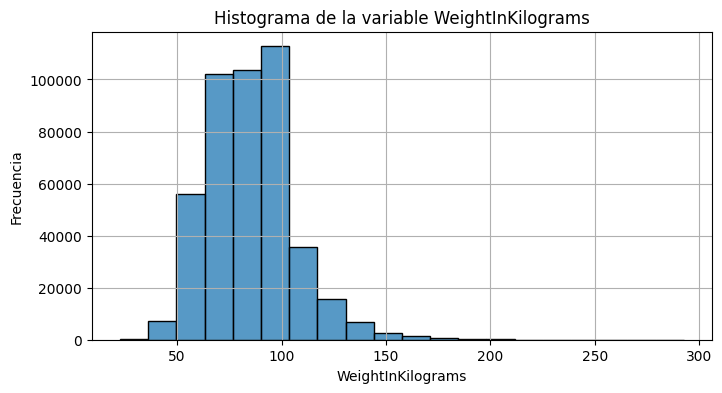

In [38]:
caracteristica= 'WeightInKilograms'
dib_histograma(caracteristica,df,20,hue=None)

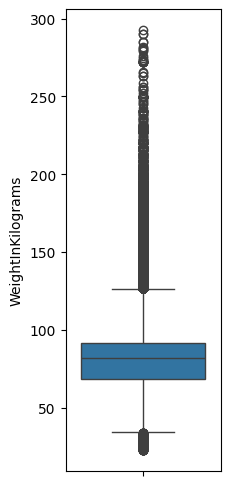

In [39]:
dib_boxplot(caracteristica,df)

###BMI

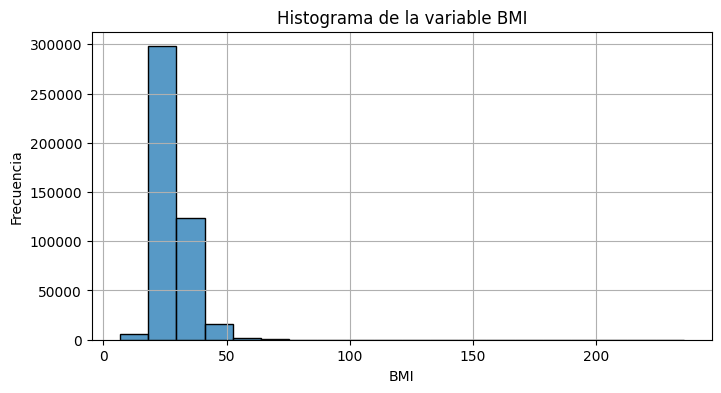

In [40]:
caracteristica= 'BMI'
dib_histograma(caracteristica,df,20,hue=None)

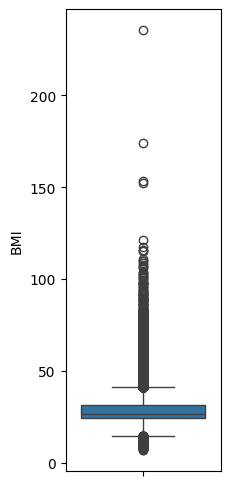

In [41]:
dib_boxplot(caracteristica,df)

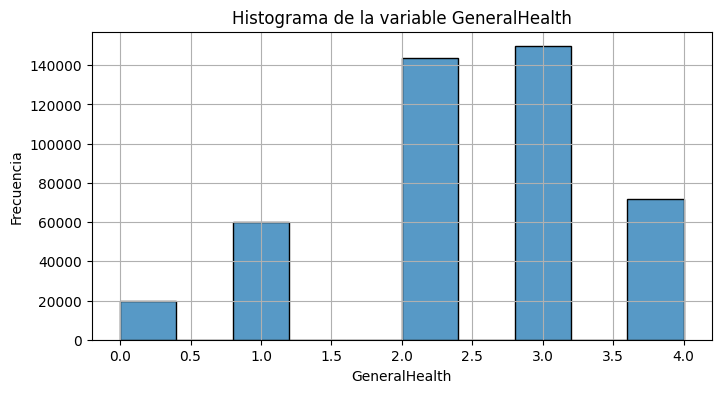

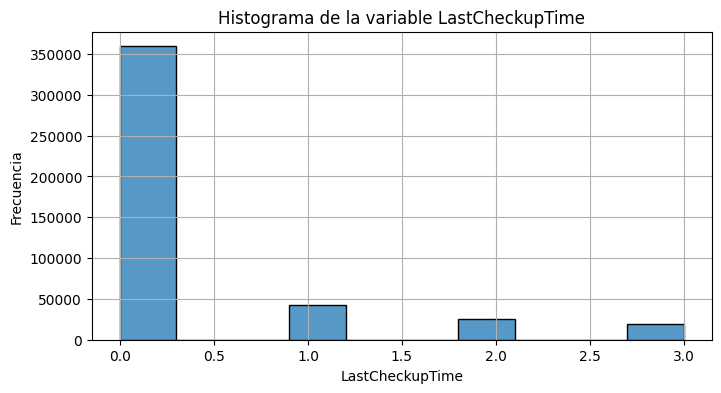

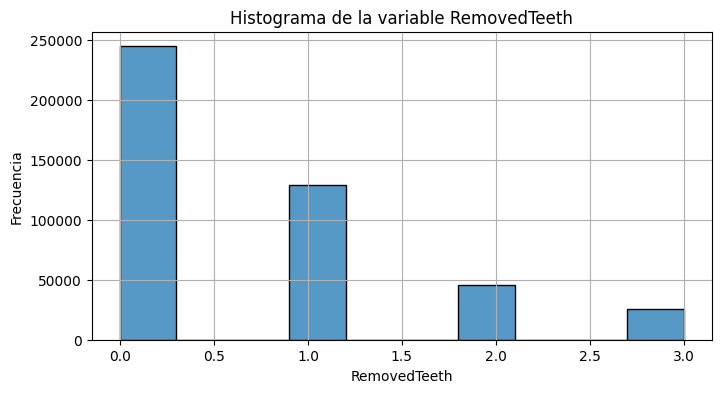

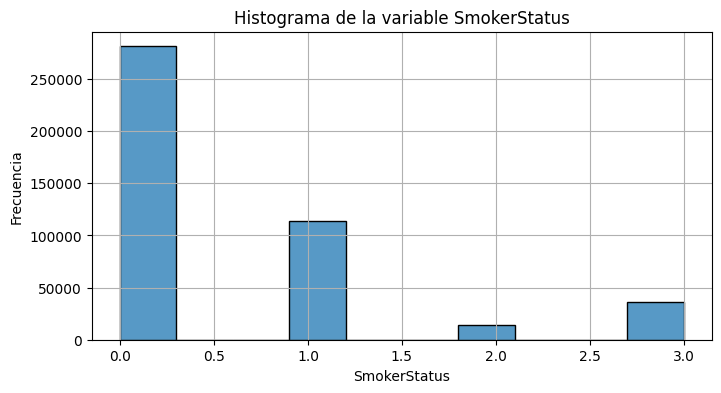

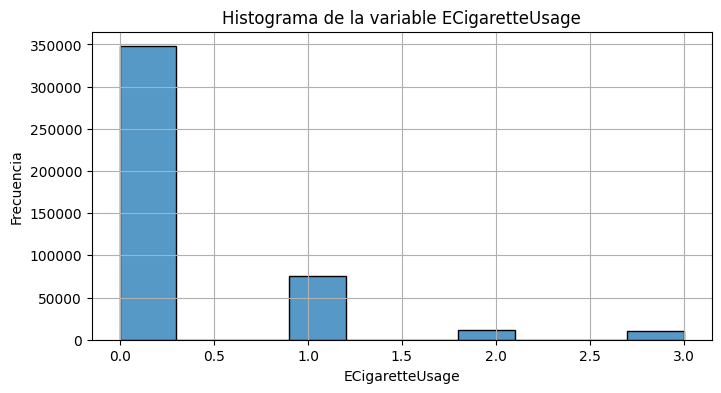

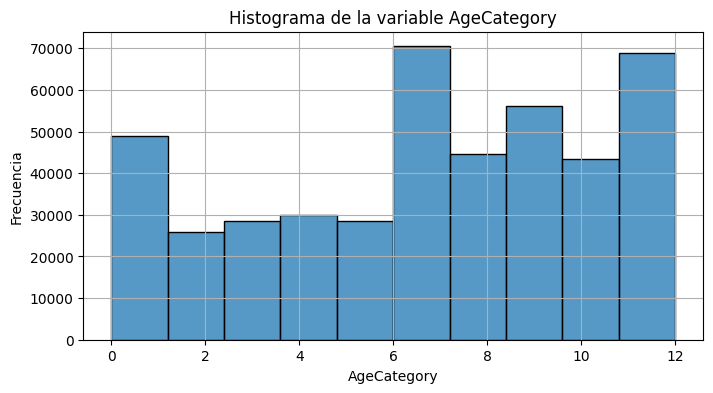

In [42]:
#Se realiza un gráfico de cada variable categórica ordinal
for columna in columnas_ordinales:
  dib_histograma(columna, df)

<ipython-input-43-87ef2c836a1f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


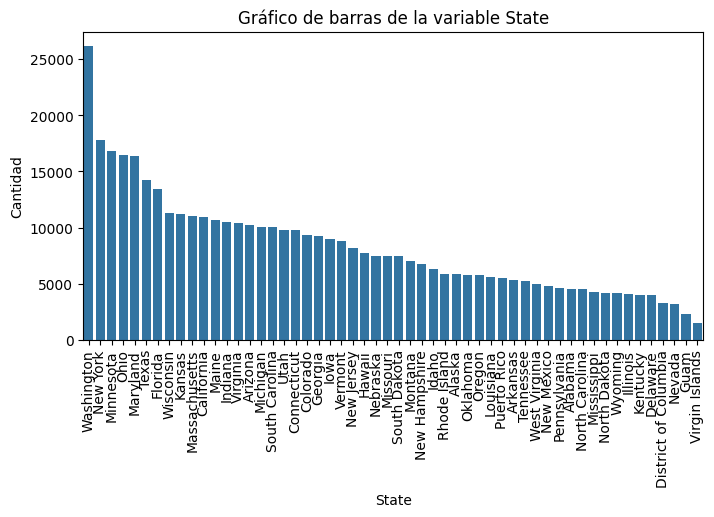

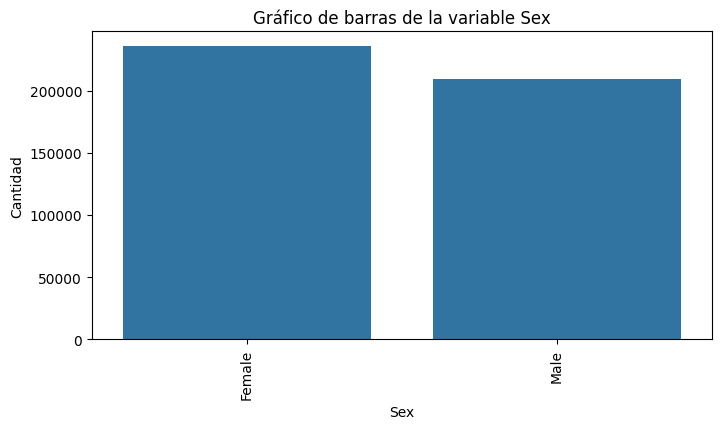

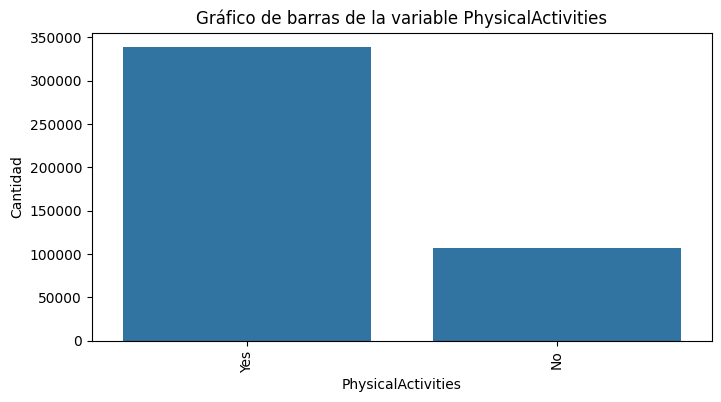

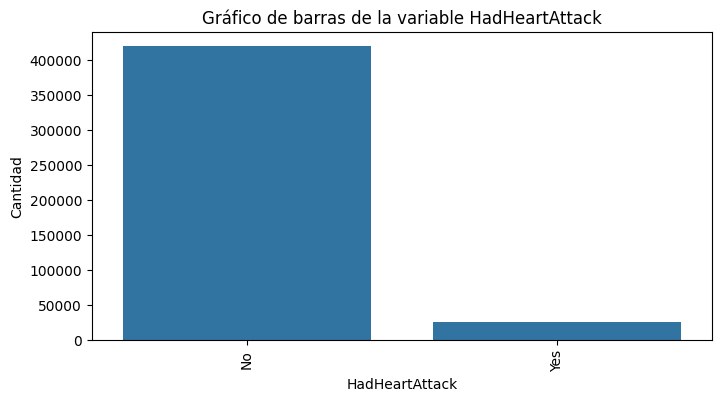

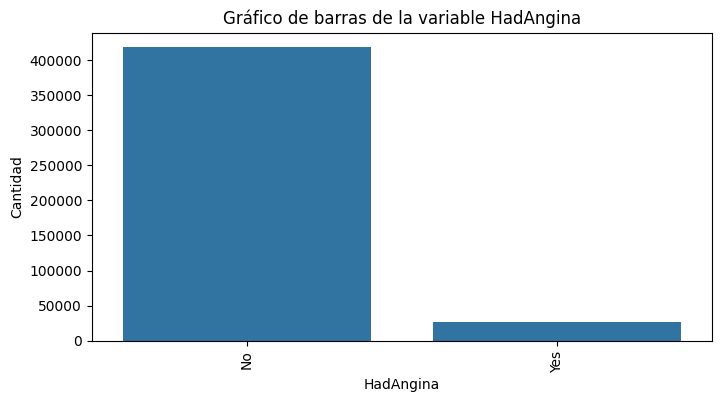

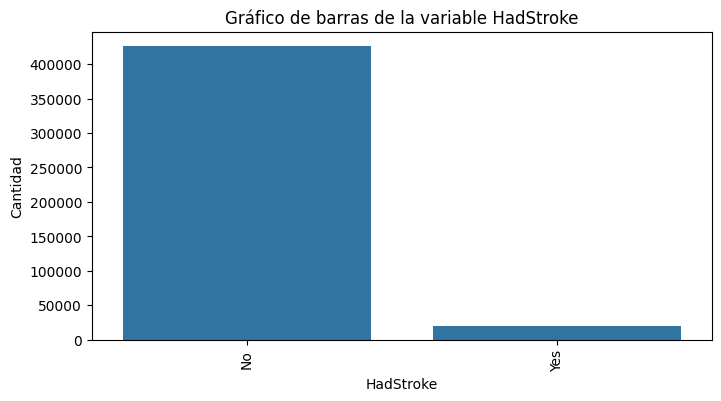

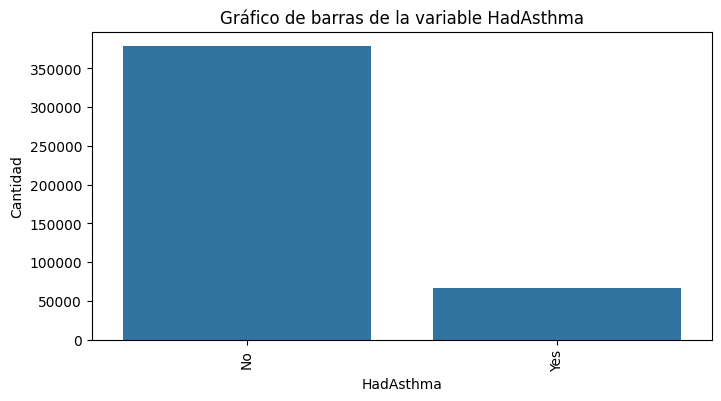

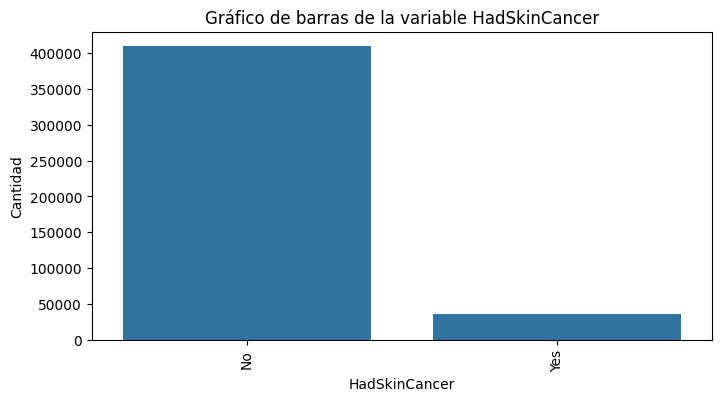

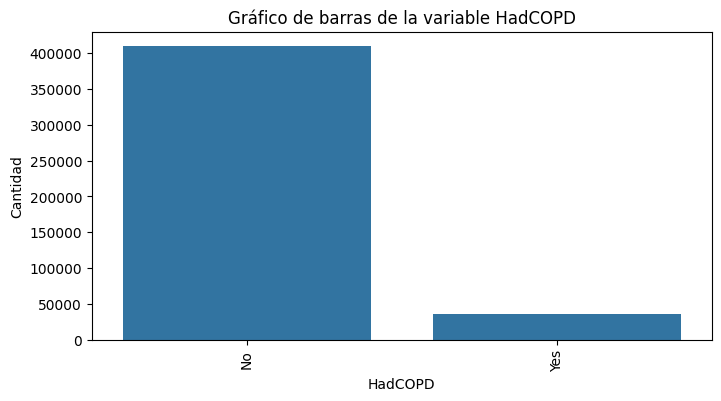

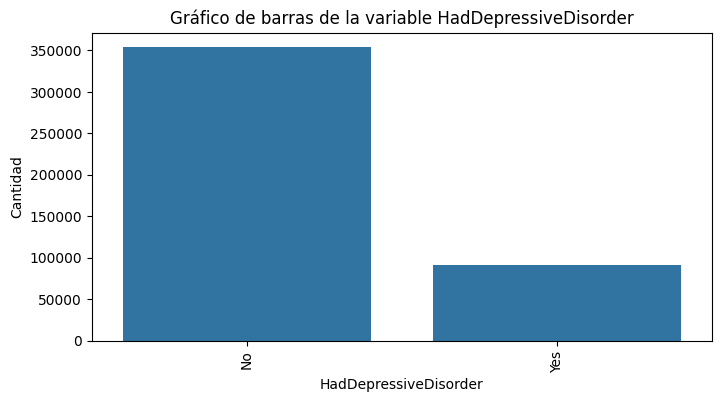

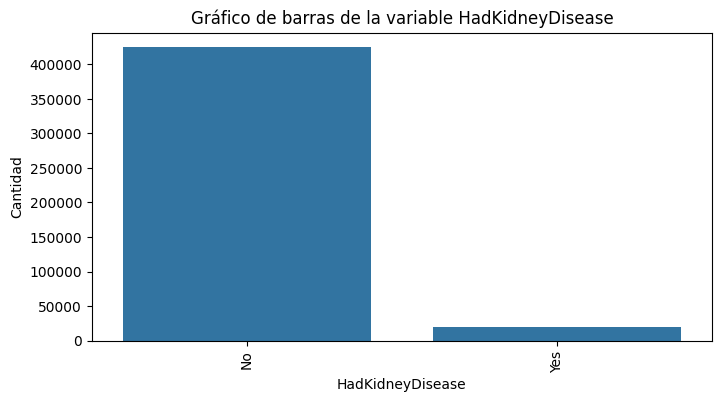

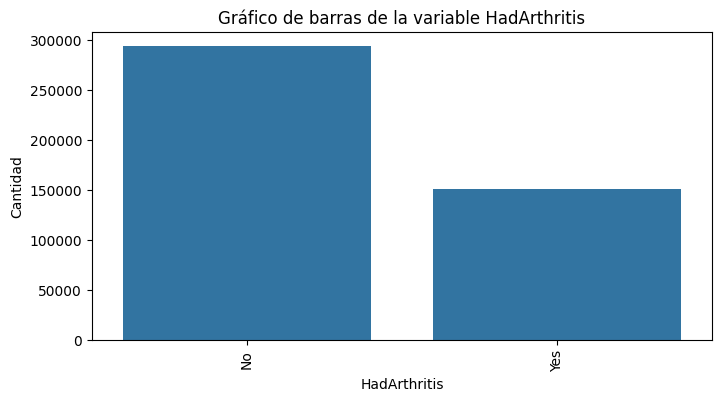

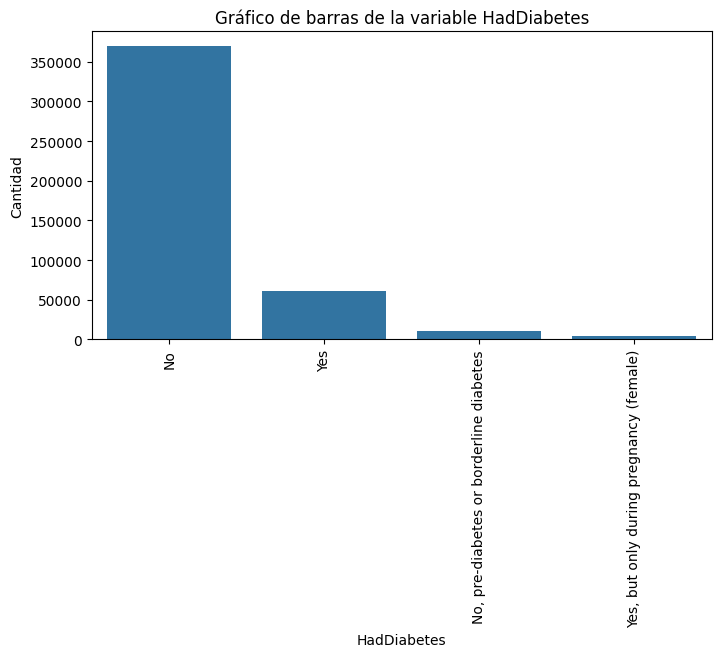

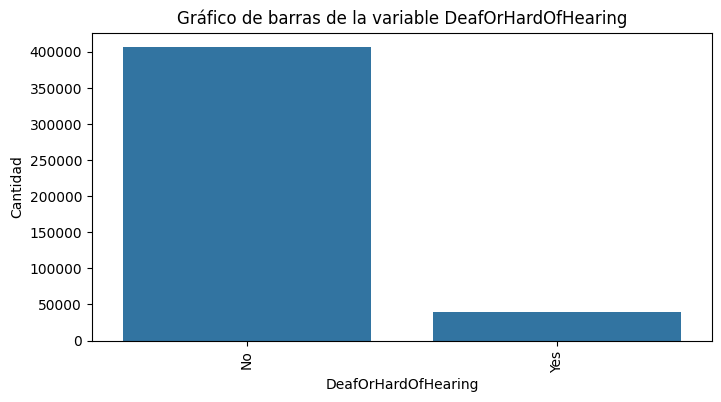

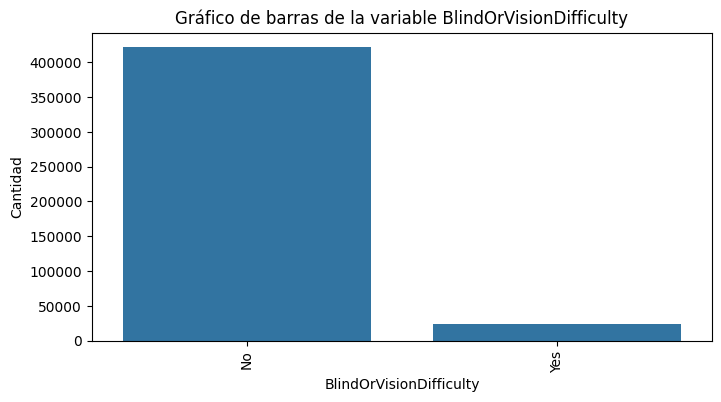

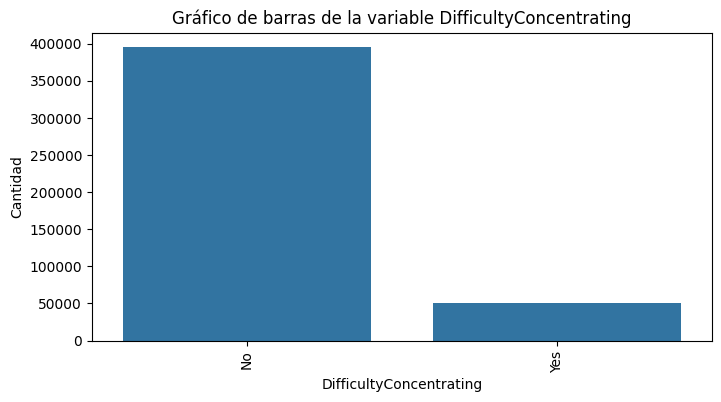

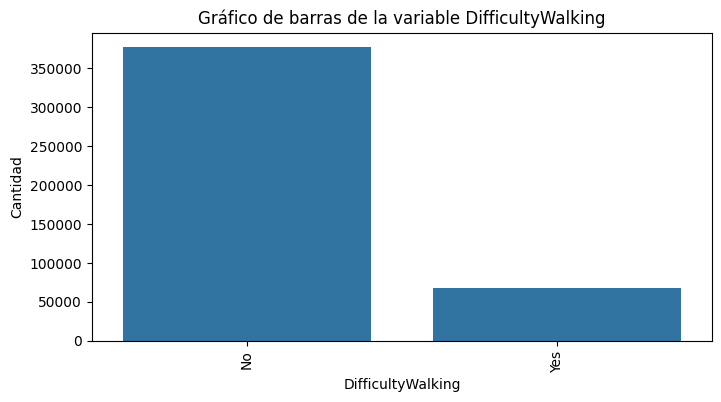

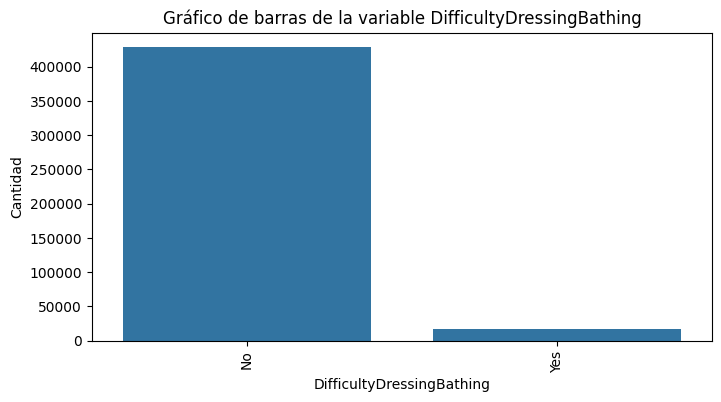

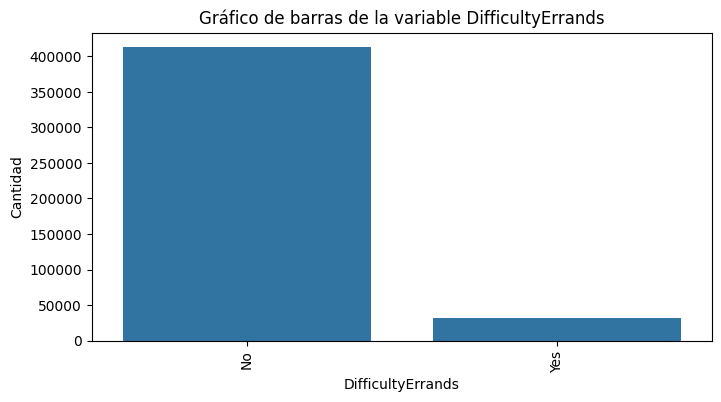

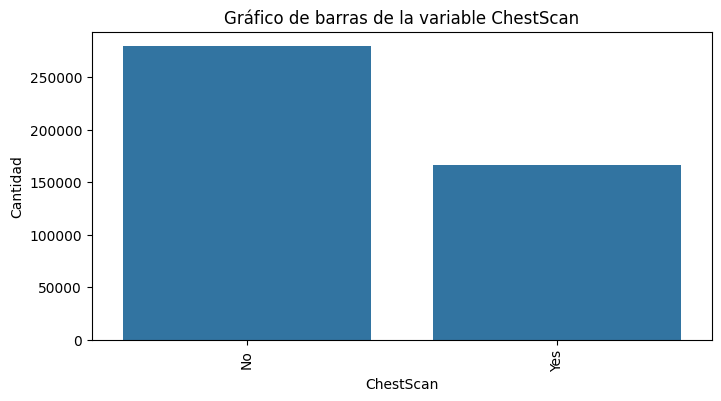

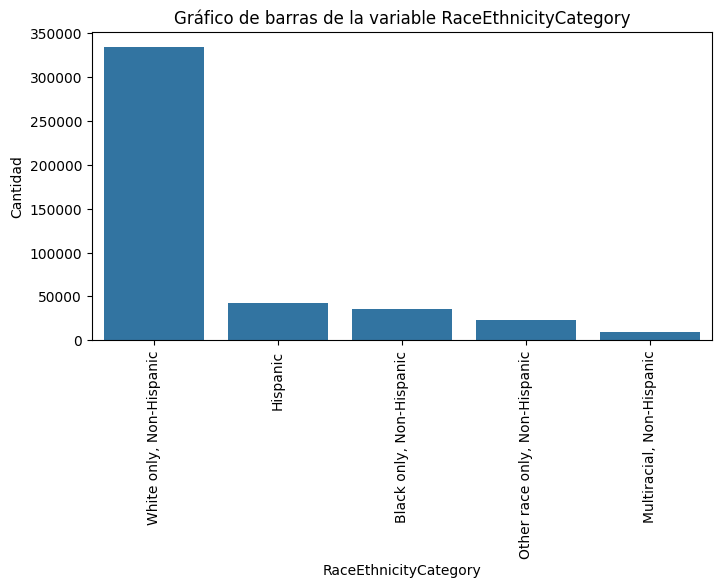

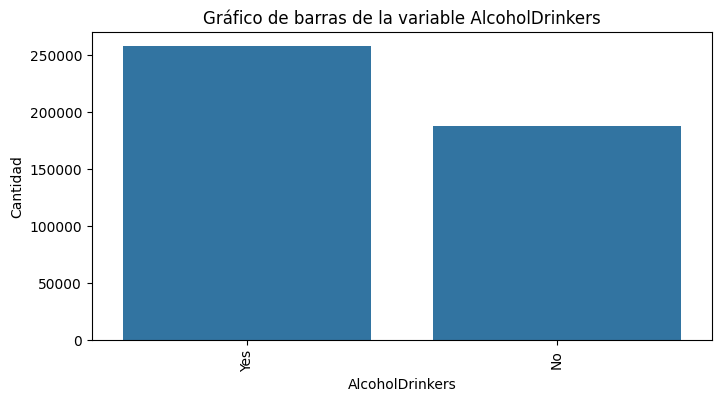

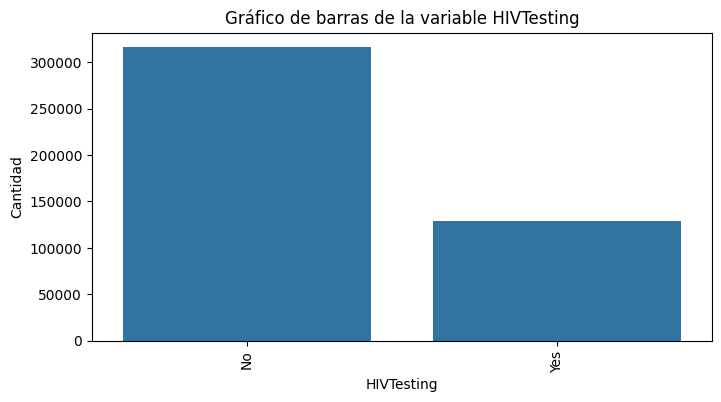

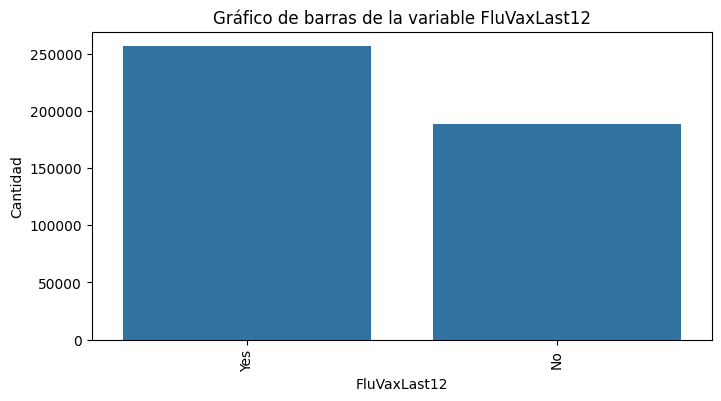

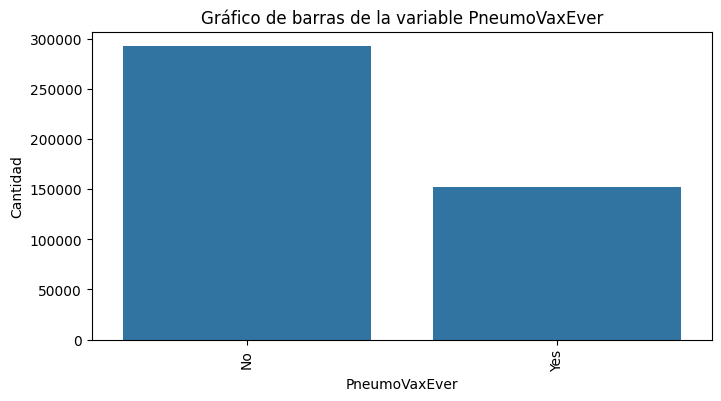

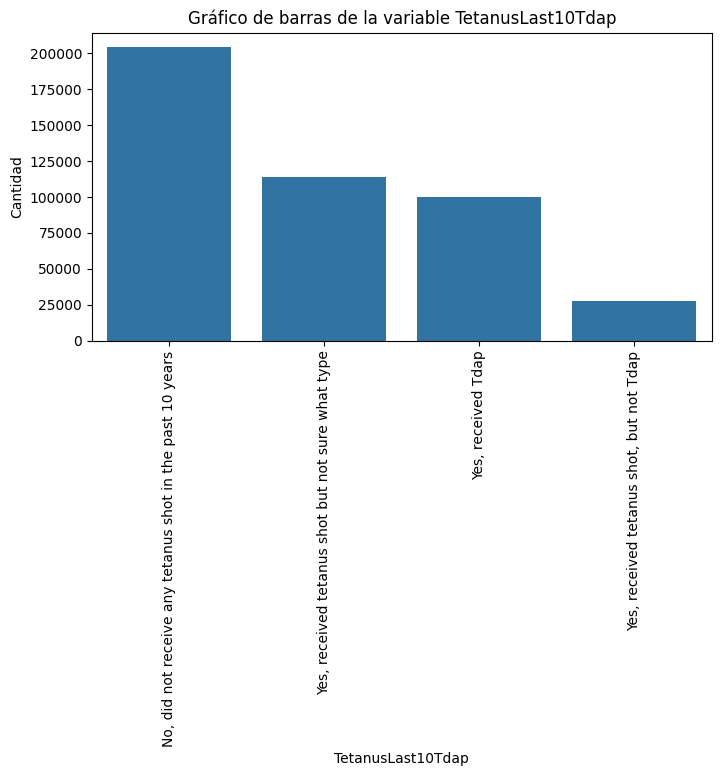

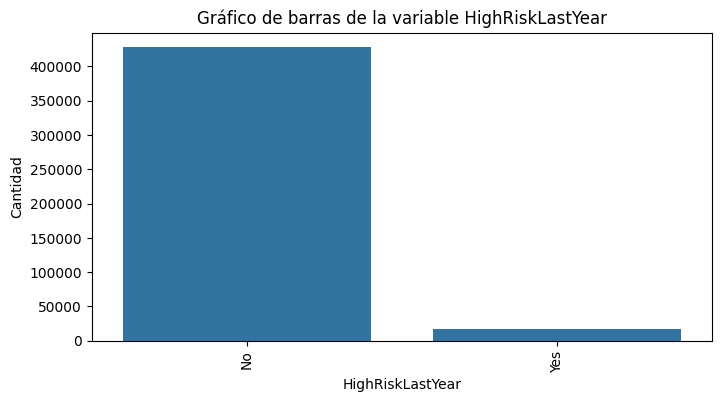

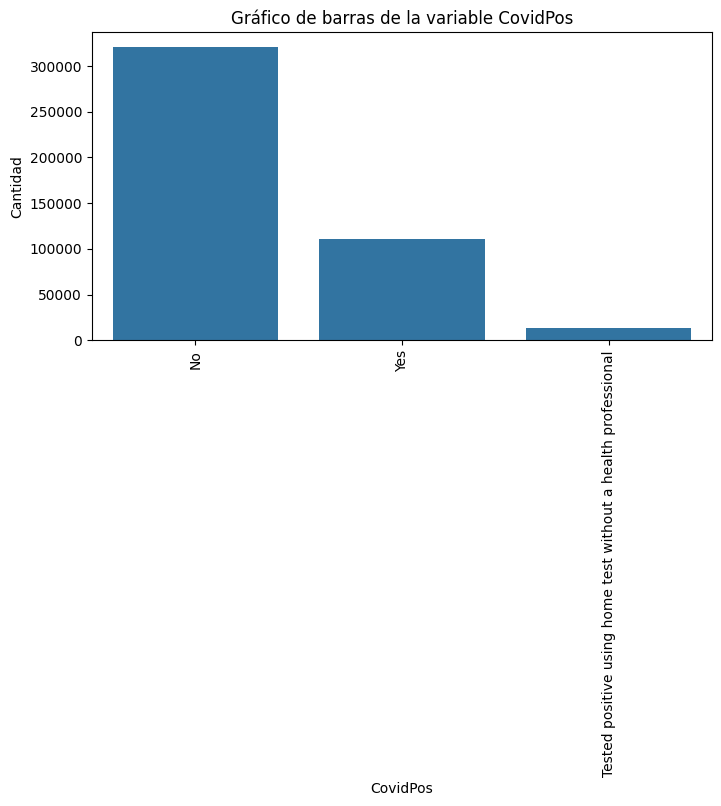

In [43]:
#Se realiza un gráfico de cada variable categórica nominal
for columna in selector_cat(df):
  plt.figure(figsize=(8,4))
  datos= df[columna].value_counts()
  sns.barplot(x=datos.index, y=datos.values)
  plt.xticks(rotation=90, fontsize=10)
  plt.title('Gráfico de barras de la variable '+columna)
  plt.ylabel('Cantidad')

##2.5 Identificar valores atípicos

In [44]:
df.describe()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,HeightInMeters,WeightInKilograms,BMI
count,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.00000,445132.000000,445132.000000
mean,2.435024,4.241187,4.293378,0.334552,7.022701,0.666753,0.560865,0.292008,6.672933,1.70123,83.797197,28.333771
std,1.051491,8.607936,8.324664,0.769151,1.493196,0.877513,0.891185,0.631983,3.569010,0.10382,20.531478,6.281431
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.91000,22.680000,6.768013
25%,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.63000,68.490000,24.410000
50%,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,7.000000,1.68000,81.650000,26.630000
75%,3.000000,3.000000,4.000000,0.000000,8.000000,1.000000,1.000000,0.000000,10.000000,1.78000,91.630000,31.090000
max,4.000000,30.000000,30.000000,3.000000,24.000000,3.000000,3.000000,3.000000,12.000000,2.41000,292.570000,235.527110


- PhysicalHealthDays: del histograma se observa que no tiene una distrbución normal (parte en su máximo cuando  en un intervalo alrededor del 0 y luego decae progresivamente ). Por esto, al aplicar la definición de outliers utilizada en el boxplot, se detectan una gran cantidad de valores fuera del rango de la normalidad. En base a esto, no se hará tratamiento de outliers hasta conocer más respecto de la distribución de esta variable.

- MentalHealthDays: tiene una comportamiento similar a PhysicalHealthDays (de hecho, tienen un correlación de 0.48 como se verá más adelante), por lo cual, se toma la misma decisión (no se realizará tratamiento de outliers hasta tener más información sobre la distribución de la variable)

- SleepHours: los datos de la columna están dentro dentro de lo esperable (de 0 hasta 24 hrs), ya que hay personas que por diversas condiciones pueden no haber dormido ninguna hora durante el día, así como hay personas que por condiciones de salud podrían encontrarse en dicho estado constantemente. Por tanto, no se eliminan outliers en esta columna


- HeightInMeters: el máximo y el mínimo están alrededor de 0.9[m] y de 2.4[m], valores que si bien no son frecuentes, sí son posibles de encontrarn en muestras poblacionales grandes. Por tanto, la muestra se mantiene como está

In [45]:
IQR_heigth = df['HeightInMeters'].quantile(0.75)-df['HeightInMeters'].quantile(0.25)
maximo_heigth = df['HeightInMeters'].quantile(0.75) + IQR_heigth*1.5
minimo_heigth = df['HeightInMeters'].quantile(0.25) - IQR_heigth*1.5
filtro_height= (df['HeightInMeters'] < minimo_heigth) | (df['HeightInMeters'] > maximo_heigth)

In [46]:
df[filtro_height].shape[0]*100/df.shape[0]

0.34955923186829974

- WeightInKilograms: si bien al graficar el histograma, la variable muestra un comportamiento normal, se detecta cierta asimetría (masa de datos cargada hacia la izquierda). Por otra parte, se tiene más de un 3% de datos fuera del rango, de acuero al criterio del boxplot. De esta forma eliminar datos fuera de rango conlleva un gran riesgo de pérdida de información y, por este motivo, se mantienen los datos como están.

In [47]:
IQR_weight = df['WeightInKilograms'].quantile(0.75)-df['WeightInKilograms'].quantile(0.25)
maximo_weight = df['WeightInKilograms'].quantile(0.75) + IQR_weight*1.5
minimo_weight = df['WeightInKilograms'].quantile(0.25) - IQR_weight*1.5
filtro_weight= (df['WeightInKilograms'] < minimo_weight) | (df['WeightInKilograms'] > maximo_weight)

In [48]:
df[filtro_weight].shape[0]*100/df.shape[0]

3.693960443194378

- BMI: Respecto al total de registros, los valores fuera de rango serían superiores al 4%, por lo cual, se evita su eliminación. Sin embargo, cuando se hizo tratamiento de datos faltantes, se completaron algunos valores usando otras columnas, ya que el índice de masa corporal se obtiene a partir del peso y de la estatura. Esto introdujo valores que están fuera del mínimo y máximo original. Para estos casos nuevos, se recortan los valores manteniendo el mínimo y máximo original si es que corresponde

In [49]:
IQR_bmi = df['BMI'].quantile(0.75)-df['BMI'].quantile(0.25)
maximo_bmi = df['BMI'].quantile(0.75) + IQR_bmi*1.5
minimo_bmi = df['BMI'].quantile(0.25) - IQR_bmi*1.5
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

In [50]:
df[filtro_bmi].shape[0]*100/df.shape[0]

4.21223367450554

Se fijan los umbrales mínimo y máximo:

In [51]:
maximo_bmi = 99.64
minimo_bmi = 12.02
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

Cantidad de valores que quedan fuera de los umbrales:

In [52]:
df[filtro_bmi].shape[0]*100/df.shape[0]

0.03571974155980698

Se modifican los valores extremos:

In [53]:
df.loc[df['BMI']<minimo_bmi,'BMI']= minimo_bmi
df.loc[df['BMI']>maximo_bmi,'BMI']= maximo_bmi

##2.6 Mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

In [54]:
y= df['HadHeartAttack']

In [55]:
y.value_counts(normalize=True)

HadHeartAttack
No     0.943594
Yes    0.056406
Name: proportion, dtype: float64

In [56]:
y= y.replace({'No':0, 'Yes':1})

In [57]:
df['HadHeartAttack'] = y

In [58]:
correlación= df.corr(numeric_only=True)

Para determinar las mayores magnitudes de correlación, se grafica el heatmap con las correlaciones en valor absoluto:

<Axes: >

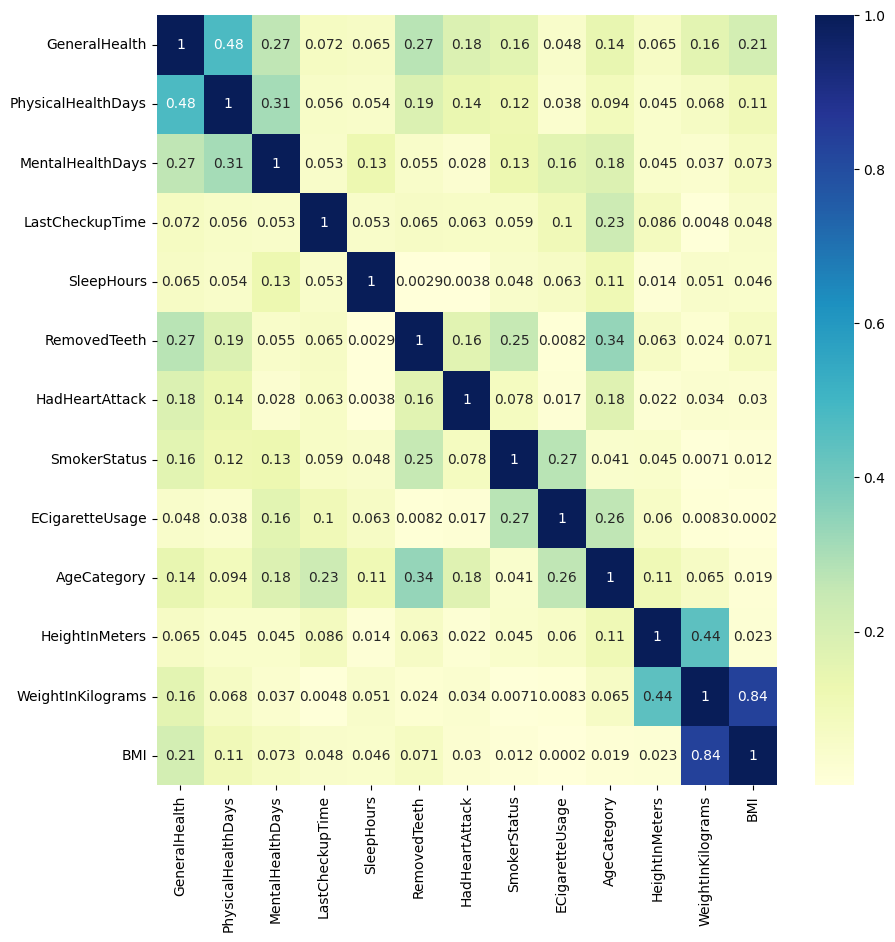

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(correlación), annot=True, cmap='YlGnBu')

- Las columnas que tienen las mayores correlaciones son GeneralHealth, AgeCategory, RemovedTeeth y PhysicalHealthDays. Las correlaciones en estas columnas van desdel 0.14 a 0.19

- La correlación más altan en los datos se produce entre las columnas WeightInKilograms y BMI, donde el valor llega a 0.86

- Correlaciones moderadas se dan entre PhysicalHealthDays y GeneralHealth (correlación igual a 0.5) y entre las columnas HeightInMeters con WeightInKilogram (correlación de 0.47)